In [2]:
import pandas as pd
import os
import glob

# 源文件夹和目标文件夹的路径
source_folder = r'C:\Users\12864\Desktop\数据科学大作业\Rural'
target_folder = r'C:\Users\12864\Desktop\数据科学大作业\Rural sum'

# 确保目标文件夹存在，如果不存在则创建
os.makedirs(target_folder, exist_ok=True)

# 获取源文件夹中所有的Excel文件
file_paths = glob.glob(os.path.join(source_folder, '*.xlsx'))

# 创建一个空的数据框架用于汇总所有数据
all_data = pd.DataFrame()

# 循环处理每一个文件
for file_path in file_paths:
    # 读取数据
    data = pd.read_excel(file_path)
    
    # 转换日期列为日期格式
    data['date'] = pd.to_datetime(data['date'])
    
    # 添加年份和月份列
    data['year_month'] = data['date'].dt.to_period('M')
    
    # 按年份和月份汇总人数
    monthly_summary = data.groupby('year_month')['population'].sum().reset_index()
    
    # 设置year_month为索引
    monthly_summary.set_index('year_month', inplace=True)
    
    # 获取文件名作为列名
    base_name = os.path.basename(file_path).replace('.xlsx', '')
    
    # 将数据添加到总的数据框架中
    if all_data.empty:
        all_data = monthly_summary.rename(columns={'population': base_name})
    else:
        all_data = all_data.join(monthly_summary.rename(columns={'population': base_name}), how='outer')
    
    print(f"文件 {base_name} 已处理")

# 将索引转换为年月格式的字符串
all_data.index = all_data.index.astype(str)

# 构建最终汇总文件的路径
summary_file_path = os.path.join(target_folder, 'all_data_summary.xlsx')

# 将所有汇总的数据保存到一个Excel文件中
all_data.to_excel(summary_file_path)

print(f"所有文件已处理并汇总保存为 {summary_file_path}")


文件 Attended an event with more than 10 people in the past 24 hours 已处理
文件 Believe social distancing is very or moderately effective for preventing the spread of COVID-19 已处理
文件 Believe that wearing a face mask is very or moderately effective for preventing the spread of COVID-19 已处理
文件 Had COVID-like illness 已处理
文件 Had influenza-like illness 已处理
文件 Has had COVID-19 已处理
文件 Reduced spending on household needs due to the cost of a COVID-19 test 已处理
文件 Spent time with someone who isn’t currently staying with them in the past 24 hours 已处理
文件 Tested for COVID-19 in the past 14 days 已处理
文件 Washed their hands 7+ times in the past 24 hours 已处理
文件 Wore a mask most or all of the time while in public in the past 7 days 已处理
文件 Worked outside their home in the past 24 hours 已处理
所有文件已处理并汇总保存为 C:\Users\12864\Desktop\数据科学大作业\Rural sum\all_data_summary.xlsx


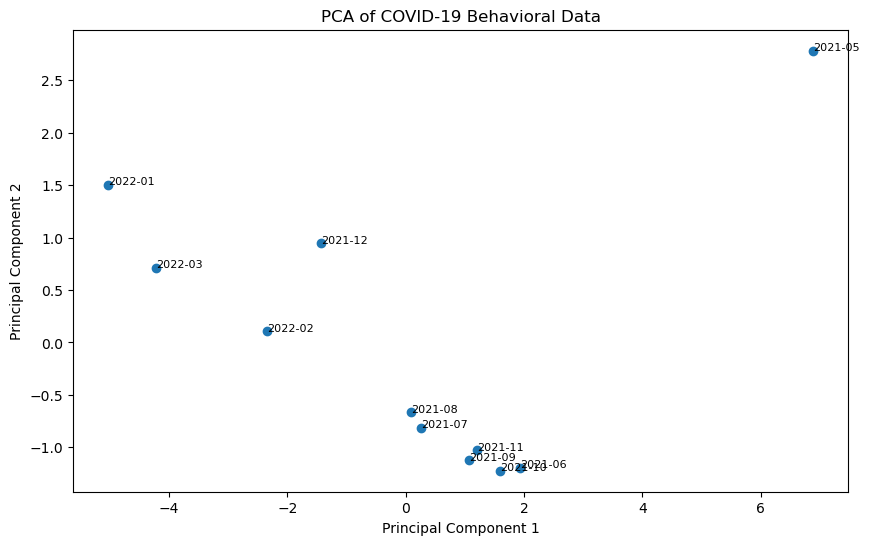

In [6]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the Excel file
file_path = r'C:\Users\12864\Desktop\数据科学大作业/数据.xlsx'
data = pd.read_excel(file_path)

# Remove the 'year_month' column and standardize the data
data_features = data.drop(columns=['year_month'])
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_features)

# Perform PCA
pca = PCA(n_components=2)  # Reducing to 2 components for visualization
principal_components = pca.fit_transform(scaled_data)
principal_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])

# Combine with the 'year_month' column for visualization purposes
final_df = pd.concat([principal_df, data[['year_month']]], axis=1)

# Plot the PCA result
plt.figure(figsize=(10, 6))
plt.scatter(final_df['Principal Component 1'], final_df['Principal Component 2'])
for i, txt in enumerate(final_df['year_month']):
    plt.annotate(txt, (final_df['Principal Component 1'][i], final_df['Principal Component 2'][i]), fontsize=8)
plt.title('PCA of COVID-19 Behavioral Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(False)
plt.show()


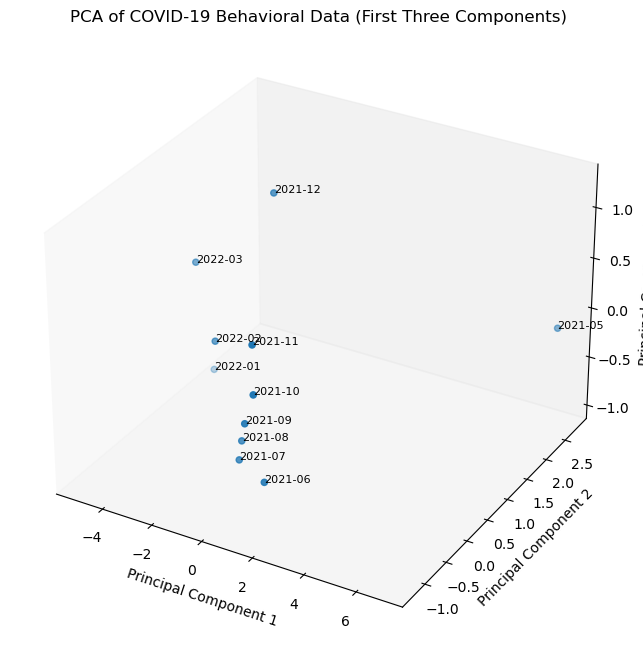

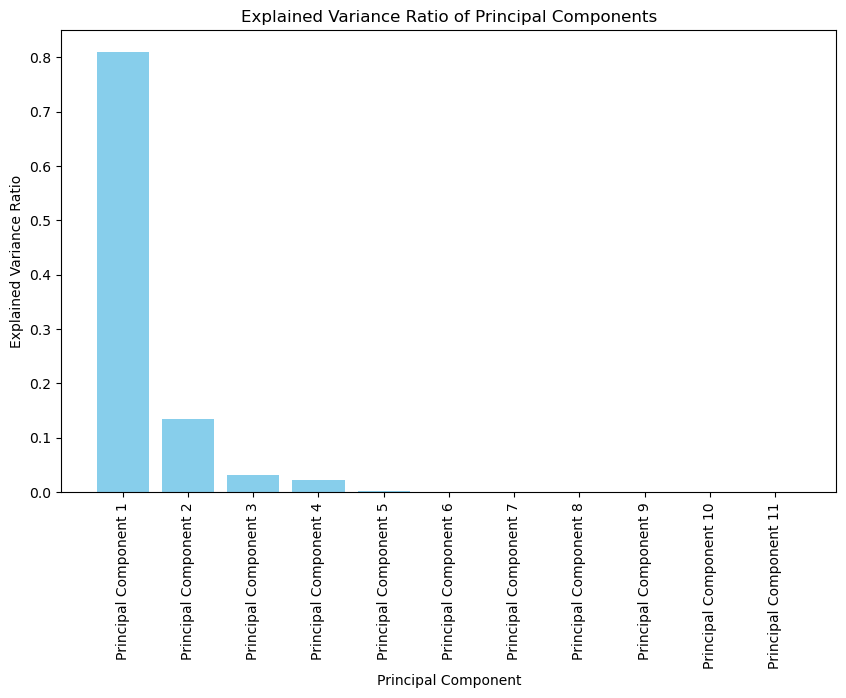

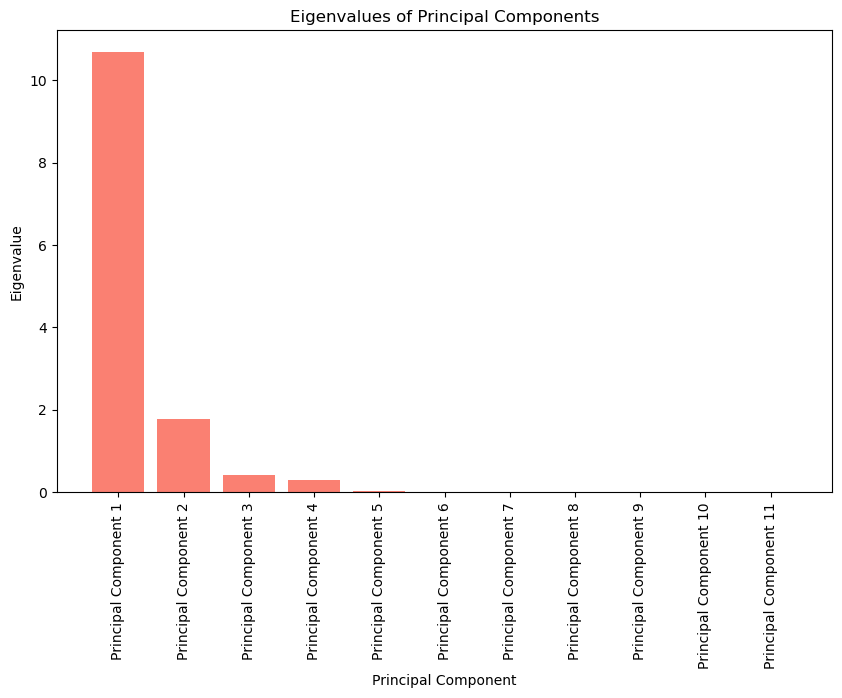

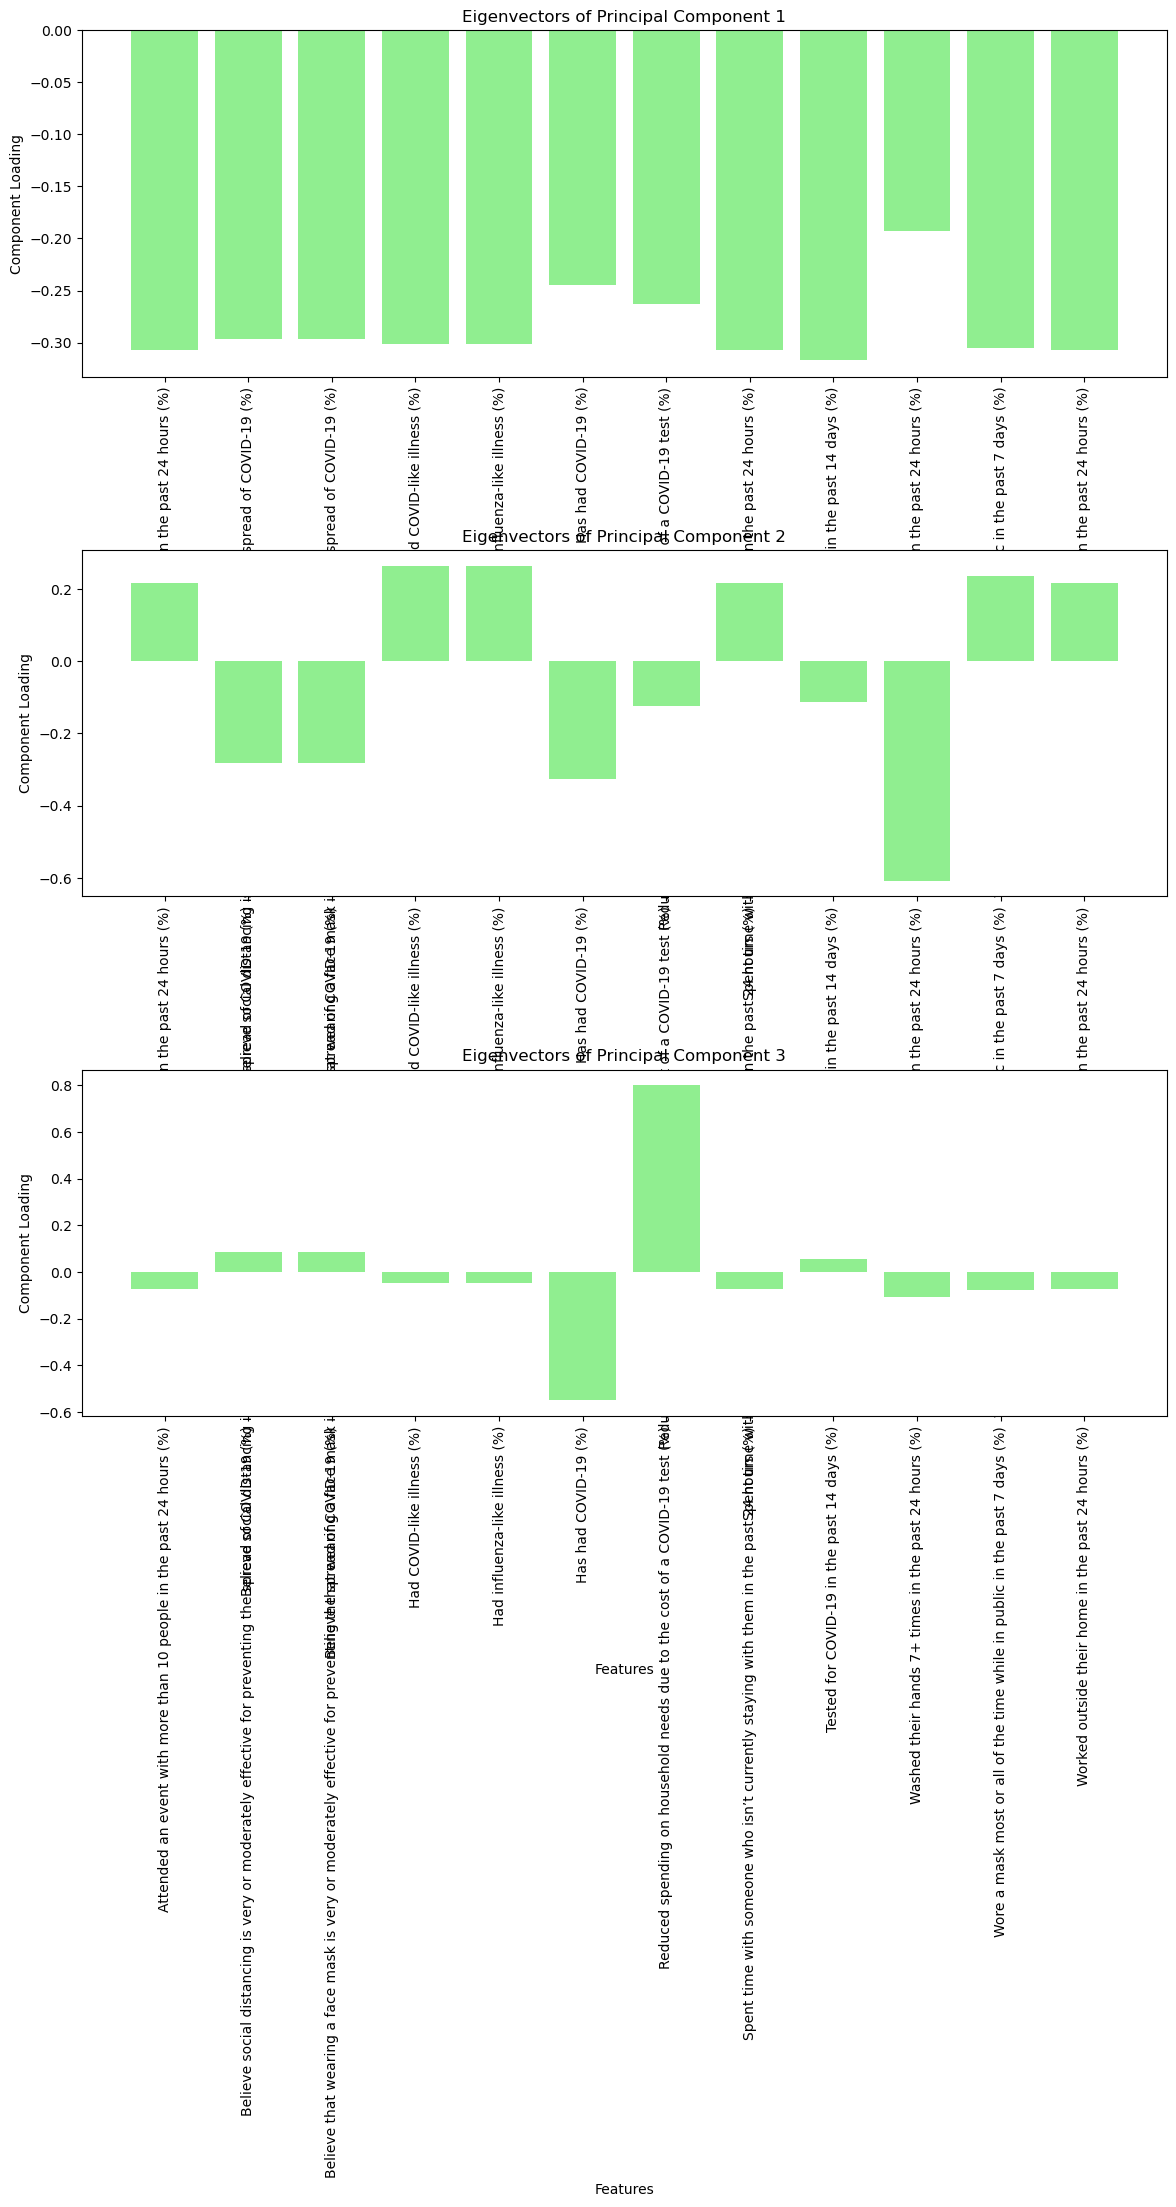

In [15]:
# Load the Excel file
file_path = r'C:\Users\12864\Desktop\数据科学大作业/数据.xlsx'
data = pd.read_excel(file_path)

# Remove the 'year_month' column and standardize the data
data_features = data.drop(columns=['year_month'])
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_features)

# Perform PCA
pca = PCA()
pca.fit(scaled_data)

# Get the principal components
components = pca.components_

# Create formulas for each principal component
formulas = []
for i, component in enumerate(components):
    formula = f"F_{i+1} = " + " + ".join([f"{round(value, 3)}*X_{j+1}" for j, value in enumerate(component)])
    formulas.append(formula)

formulas



['F_1 = -0.307*X_1 + -0.296*X_2 + -0.296*X_3 + -0.301*X_4 + -0.301*X_5 + -0.245*X_6 + -0.263*X_7 + -0.307*X_8 + -0.317*X_9 + -0.192*X_10 + -0.305*X_11 + -0.307*X_12',
 'F_2 = 0.217*X_1 + -0.282*X_2 + -0.282*X_3 + 0.265*X_4 + 0.265*X_5 + -0.326*X_6 + -0.124*X_7 + 0.217*X_8 + -0.112*X_9 + -0.608*X_10 + 0.238*X_11 + 0.217*X_12',
 'F_3 = -0.074*X_1 + 0.083*X_2 + 0.085*X_3 + -0.049*X_4 + -0.049*X_5 + -0.551*X_6 + 0.8*X_7 + -0.074*X_8 + 0.054*X_9 + -0.108*X_10 + -0.078*X_11 + -0.074*X_12',
 'F_4 = 0.109*X_1 + 0.217*X_2 + 0.216*X_3 + -0.071*X_4 + -0.071*X_5 + -0.715*X_6 + -0.472*X_7 + 0.109*X_8 + 0.095*X_9 + 0.338*X_10 + 0.059*X_11 + 0.109*X_12',
 'F_5 = -0.077*X_1 + -0.405*X_2 + -0.404*X_3 + 0.331*X_4 + 0.331*X_5 + -0.122*X_6 + 0.111*X_7 + -0.077*X_8 + -0.044*X_9 + 0.638*X_10 + 0.012*X_11 + -0.077*X_12',
 'F_6 = -0.354*X_1 + 0.188*X_2 + 0.196*X_3 + 0.392*X_4 + 0.392*X_5 + -0.063*X_6 + -0.2*X_7 + -0.354*X_8 + 0.368*X_9 + -0.241*X_10 + -0.085*X_11 + -0.354*X_12',
 'F_7 = 0.12*X_1 + 0.171*X_2 +

In [41]:
# Get the regression coefficients
coefficients = model.params
intercept = coefficients[0]
coef_1 = coefficients[1]
coef_2 = coefficients[2]

# Construct the regression equation
regression_equation = f"Death_Count = {intercept:.3f} + {coef_1:.3f} * PC1 + {coef_2:.3f} * PC2"
regression_equation


'Death_Count = -0.374 + 0.240 * PC1 + 0.161 * PC2'

In [19]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load the Excel file
file_path = r'C:\Users\12864\Desktop\数据科学大作业/数据.xlsx'
data = pd.read_excel(file_path)

# Define target variable (for example, the first column)
target = data.iloc[:, 1]  # Assuming the second column is the target variable
data_features = data.drop(columns=['year_month'])

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_features)

# Perform PCA
pca = PCA()
principal_components = pca.fit_transform(scaled_data)

# Select the number of components to use (e.g., 5 components)
num_components = 5
X = principal_components[:, :num_components]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.2, random_state=42)

# Perform linear regression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Make predictions
y_pred = regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2


(11902111.234209286, 0.5052836753754384)

Size of merged data: (11, 14)
Size of training set: (7, 2)
Size of testing set: (4, 2)


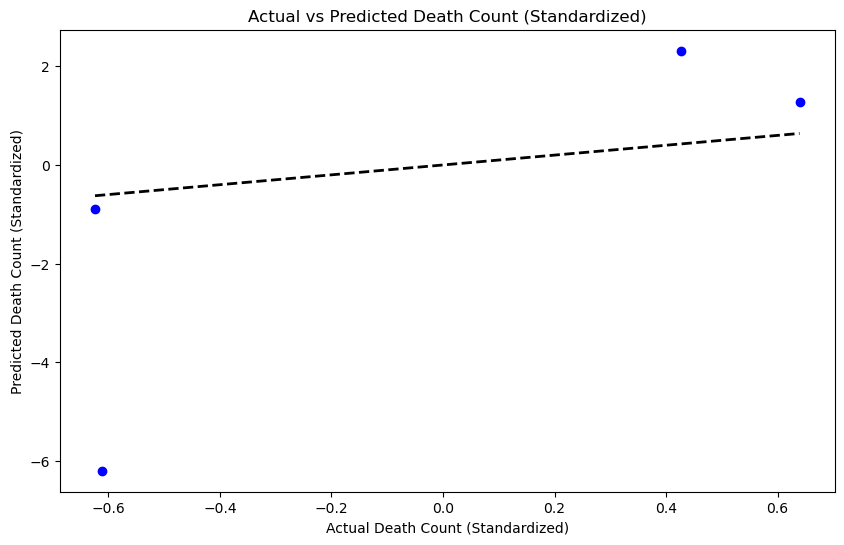

,Source,Sum of Squares,Degrees of Freedom,Mean Square,F-Statistic,P-Value
0,Model,45.922754,2,22.961377,0.650999,0.659094
1,Residual,35.270964,1,35.270964,,
2,Total,1.345803,3,,,


In [23]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats

# Load the original Excel file
file_path = r'C:\Users\12864\Desktop\数据科学大作业/数据.xlsx'
data = pd.read_excel(file_path)

# Load the new Excel file with death counts
death_counts_path =r'C:\Users\12864\Desktop\数据科学大作业/死亡人数筛选后求和.xlsx'
death_counts_data = pd.read_excel(death_counts_path)

# Merge the datasets on 'year_month'
merged_data = pd.merge(data, death_counts_data, on='year_month')

# Check the size of the merged data
print("Size of merged data:", merged_data.shape)

# Define target variable
target = merged_data['1COVID-19death']
data_features = merged_data.drop(columns=['year_month', '1COVID-19death'])

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_features)

# Perform PCA
pca = PCA()
principal_components = pca.fit_transform(scaled_data)

# Select the number of components to use (5 components)
num_components = 2
X = principal_components[:, :num_components]

# Standardize the target variable (death counts)
scaler_target = StandardScaler()
scaled_target = scaler_target.fit_transform(target.values.reshape(-1, 1)).flatten()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, scaled_target, test_size=0.3, random_state=42)

# Check the size of the training and testing sets
print("Size of training set:", X_train.shape)
print("Size of testing set:", X_test.shape)

# Add constant to the features for OLS regression
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

# Fit the model using OLS
model = sm.OLS(y_train, X_train_sm).fit()

# Make predictions
y_pred_sm = model.predict(X_test_sm)

# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_sm, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Death Count (Standardized)')
plt.ylabel('Predicted Death Count (Standardized)')
plt.title('Actual vs Predicted Death Count (Standardized)')
plt.show()

# Generate ANOVA table manually
ssr = np.sum((y_pred_sm - y_test.mean())**2)
sse = np.sum((y_test - y_pred_sm)**2)
sst = np.sum((y_test - y_test.mean())**2)
df_model = X_train_sm.shape[1] - 1
df_total = len(y_test) - 1
df_resid = df_total - df_model
msr = ssr / df_model
mse = sse / df_resid
f_stat = msr / mse
p_value = stats.f.sf(f_stat, df_model, df_resid)

anova_table = pd.DataFrame({
    'Source': ['Model', 'Residual', 'Total'],
    'Sum of Squares': [ssr, sse, sst],
    'Degrees of Freedom': [df_model, df_resid, df_total],
    'Mean Square': [msr, mse, ''],
    'F-Statistic': [f_stat, '', ''],
    'P-Value': [p_value, '', '']
})

anova_table


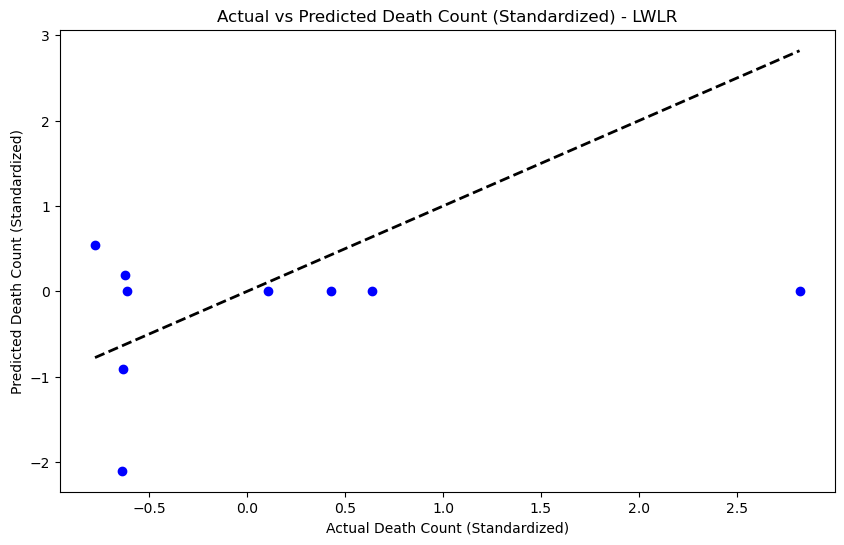

,Source,Sum of Squares,Degrees of Freedom,Mean Square,F-Statistic,P-Value
0,Model,5.997733,2,2.998866,1.328472,0.332935
1,Residual,13.544279,6,2.25738,,
2,Total,10.671413,8,,,


Decision Tree Regressor - MSE: 1.5323032059483679, R^2: -0.2923057706239678
Random Forest Regressor - MSE: 1.456822585805841, R^2: -0.22864732456590353


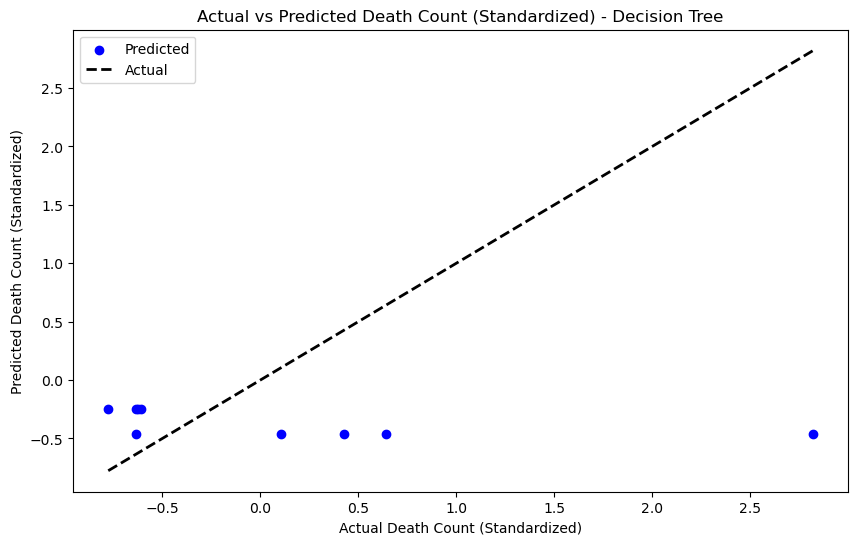

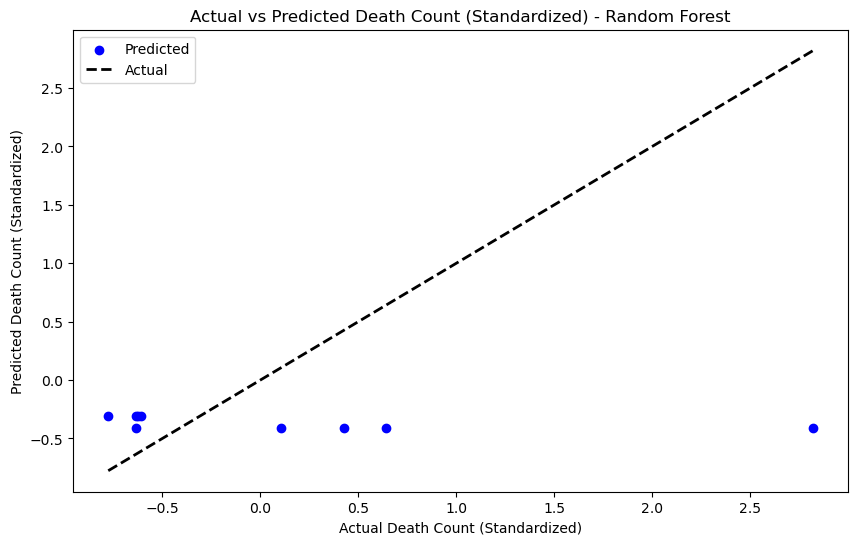

Decision Tree Regressor - MSE: 1.5323032059483679, R^2: -0.2923057706239678
Random Forest Regressor - MSE: 1.456822585805841, R^2: -0.22864732456590353


(     Source  Sum of Squares  Degrees of Freedom Mean Square F-Statistic  \
 0     Model        1.876033                   1    1.876033    0.952251   
 1  Residual       13.790729                   7    1.970104               
 2     Total       10.671413                   8                           
 
     P-Value  
 0  0.361656  
 1            
 2            ,
      Source  Sum of Squares  Degrees of Freedom Mean Square F-Statistic  \
 0     Model        1.793483                   1    1.793483    0.957516   
 1  Residual       13.111403                   7    1.873058               
 2     Total       10.671413                   8                           
 
     P-Value  
 0  0.360412  
 1            
 2            )

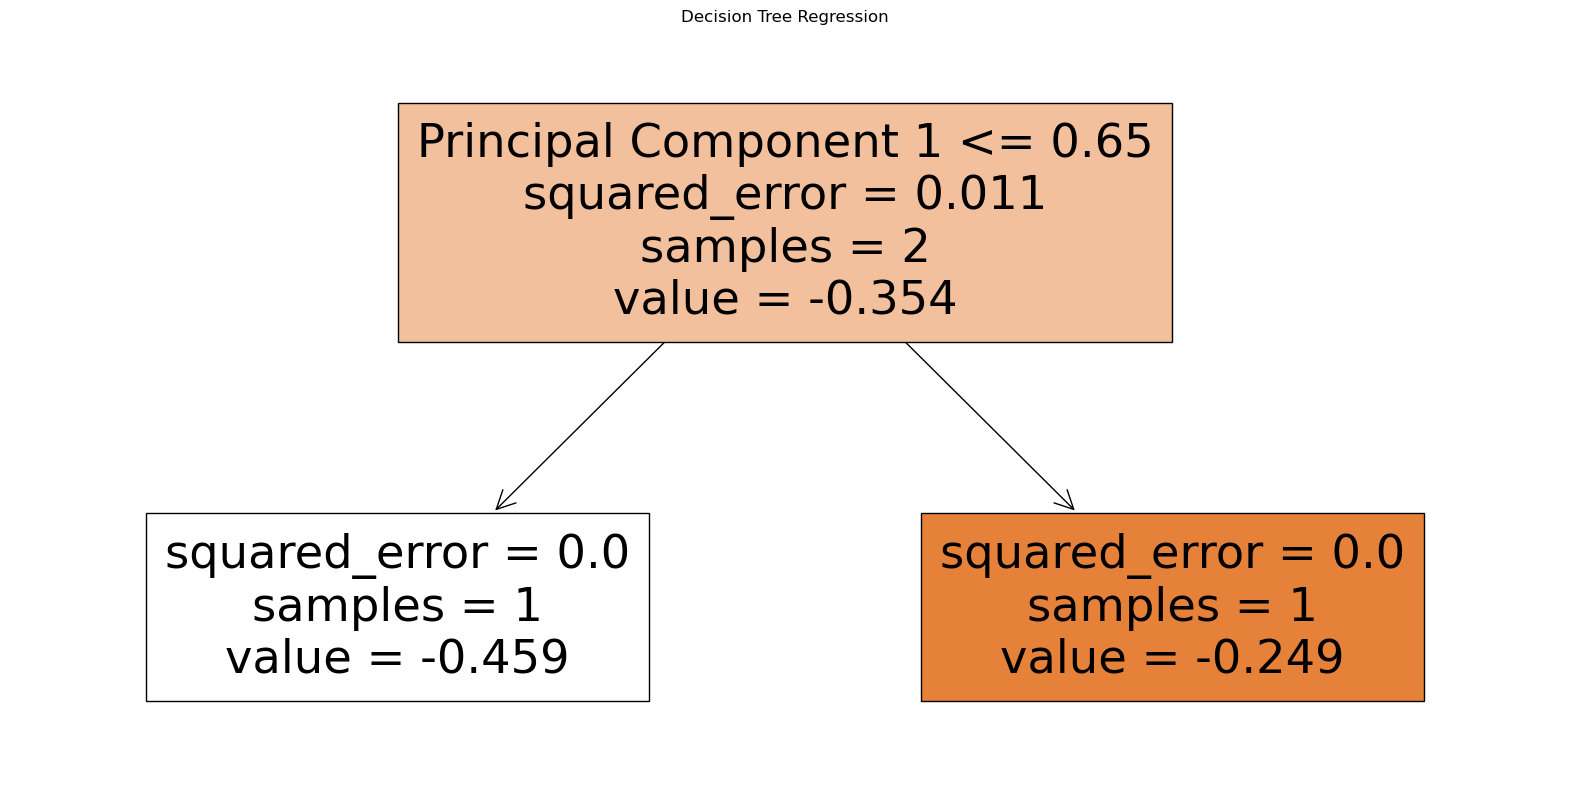

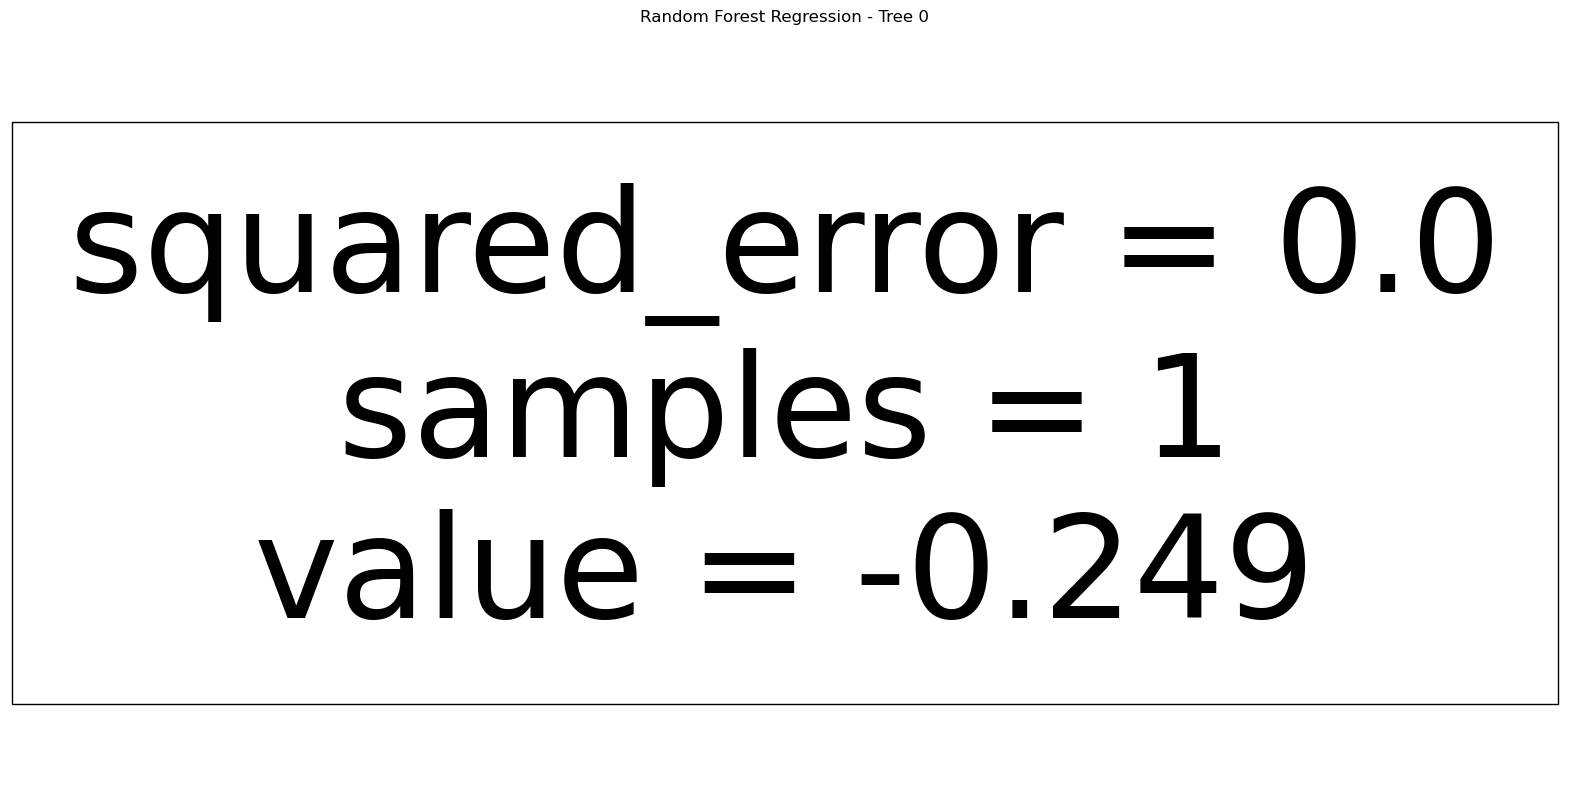

BP Neural Network Regressor - MSE: 1.6402053545749584, R^2: -0.3833077138370049


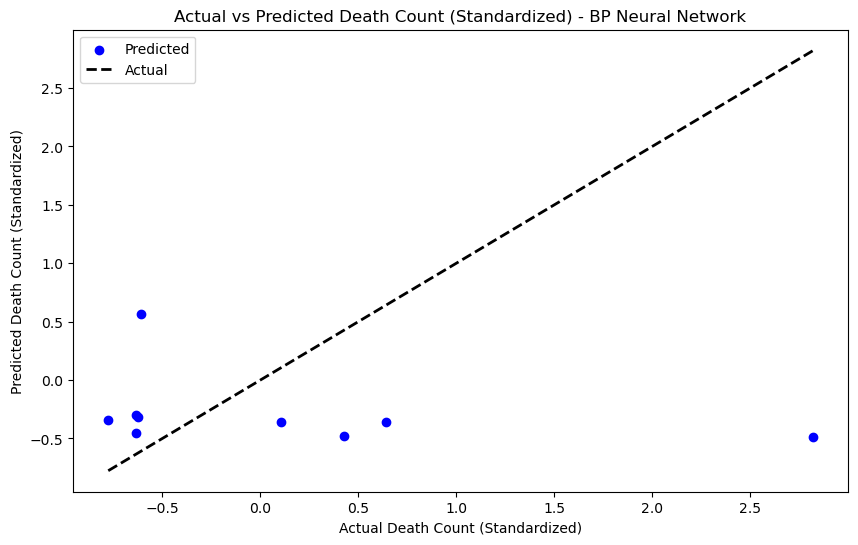

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the original Excel file
file_path = r'C:\Users\12864\Desktop\数据科学大作业/数据.xlsx'
data = pd.read_excel(file_path)

# Load the new Excel file with death counts
death_counts_path = r'C:\Users\12864\Desktop\数据科学大作业/死亡人数筛选后求和.xlsx'
death_counts_data = pd.read_excel(death_counts_path)

# Merge the datasets on 'year_month'
merged_data = pd.merge(data, death_counts_data, on='year_month')

# Define target variable (death counts)
target = merged_data['1COVID-19death']
data_features = merged_data.drop(columns=['year_month', '1COVID-19death'])

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_features)

# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

# Create a DataFrame with the principal components
principal_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])

# Standardize the target variable (death counts)
scaler_target = StandardScaler()
scaled_target = scaler_target.fit_transform(target.values.reshape(-1, 1)).flatten()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(principal_df, scaled_target, test_size=9/11, random_state=42)

# BP Neural Network (MLPRegressor)
mlp_regressor = MLPRegressor(hidden_layer_sizes=(10, 10, 10), max_iter=1000, random_state=42)
mlp_regressor.fit(X_train, y_train)
y_pred_mlp = mlp_regressor.predict(X_test)

# Evaluate the model
mse_mlp = mean_squared_error(y_test, y_pred_mlp)
r2_mlp = r2_score(y_test, y_pred_mlp)

# Print the evaluation metrics
print(f"BP Neural Network Regressor - MSE: {mse_mlp}, R^2: {r2_mlp}")

# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_mlp, color='blue', label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Actual')
plt.xlabel('Actual Death Count (Standardized)')
plt.ylabel('Predicted Death Count (Standardized)')
plt.title('Actual vs Predicted Death Count (Standardized) - BP Neural Network')
plt.legend()
plt.show()

MSE: 0.1005584547682069, R²: 0.7134062241043675


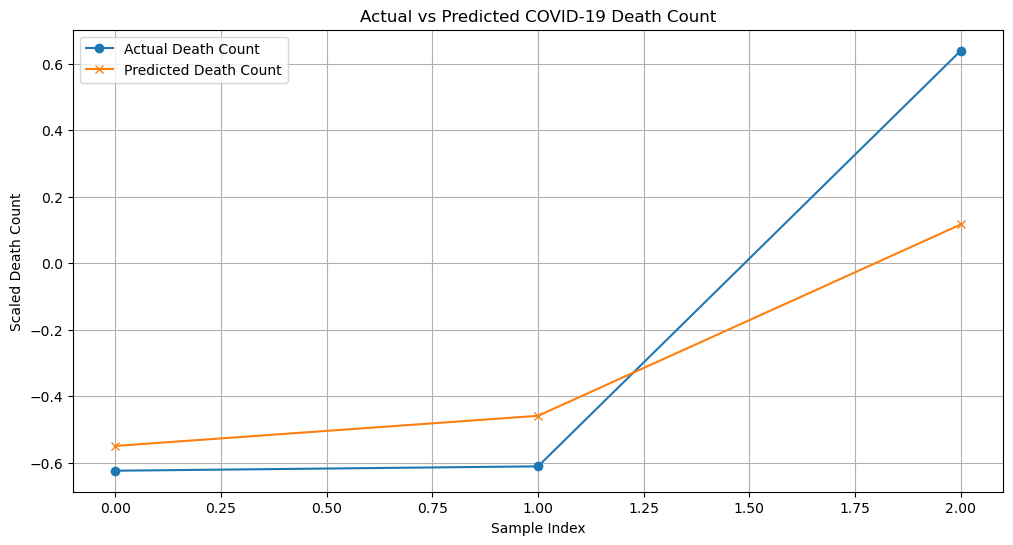

MSE: 0.004689507401871564, R²： 0.9953104925981284


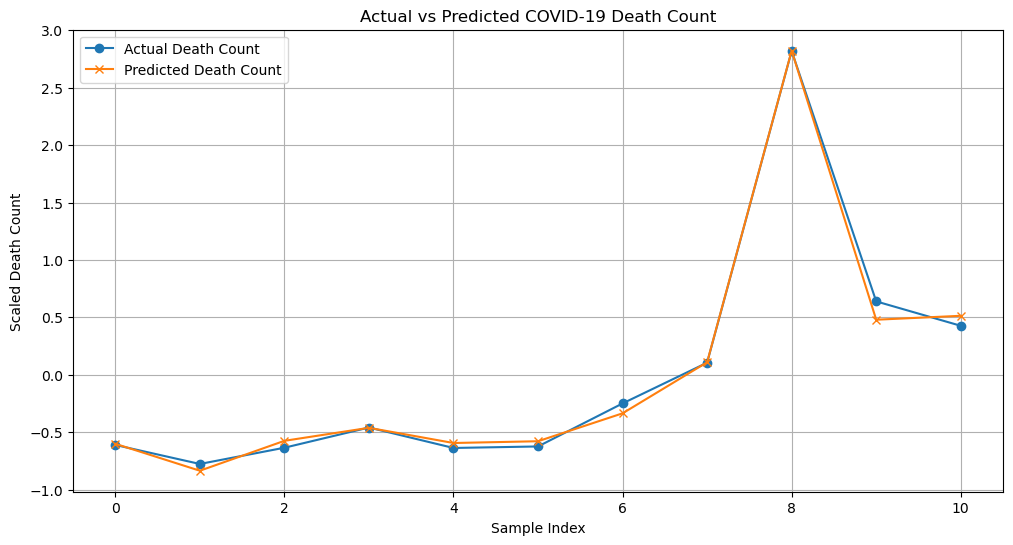

MSE: 0.004689507401871564, R²: 0.9953104925981284


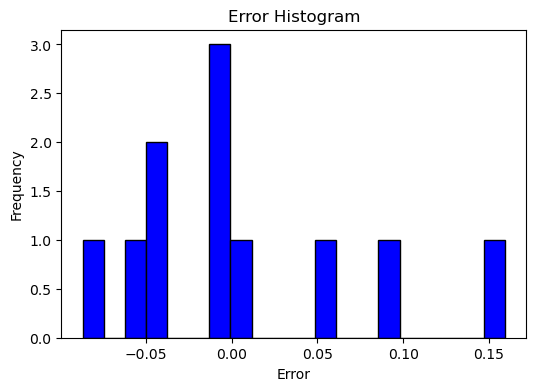

In [7]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

data_file_1 = r'C:\Users\12864\Desktop\数据科学大作业/数据.xlsx'
data_file_2 = r'C:\Users\12864\Desktop\数据科学大作业/死亡人数筛选后求和.xlsx'

data_1 = pd.read_excel(data_file_1)
data_2 = pd.read_excel(data_file_2)

merged_data = pd.merge(data_1, data_2, on='year_month')
merged_data = merged_data.drop(columns=['year_month'])

missing_values = merged_data.isnull().sum()

if missing_values.sum() > 0:
    merged_data = merged_data.fillna(merged_data.mean())

scaler = StandardScaler()
scaled_data = scaler.fit_transform(merged_data)

X = scaled_data[:, :-1]
y = scaled_data[:, -1]

mlp_improved = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=1000, random_state=42)
mlp_improved.fit(X, y)

y_pred = mlp_improved.predict(X)

mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f'MSE: {mse}, R²: {r2}')

# Plotting error histogram
errors = y - y_pred

plt.figure(figsize=(6, 4))
plt.hist(errors, bins=20, color='blue', edgecolor='black')
plt.title('Error Histogram')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()


          Set  Samples       MSE        R²
0    Training        3  0.000786  0.991448
1  Validation        4  1.797957  0.195787
2     Testing        4  0.080303  0.761322


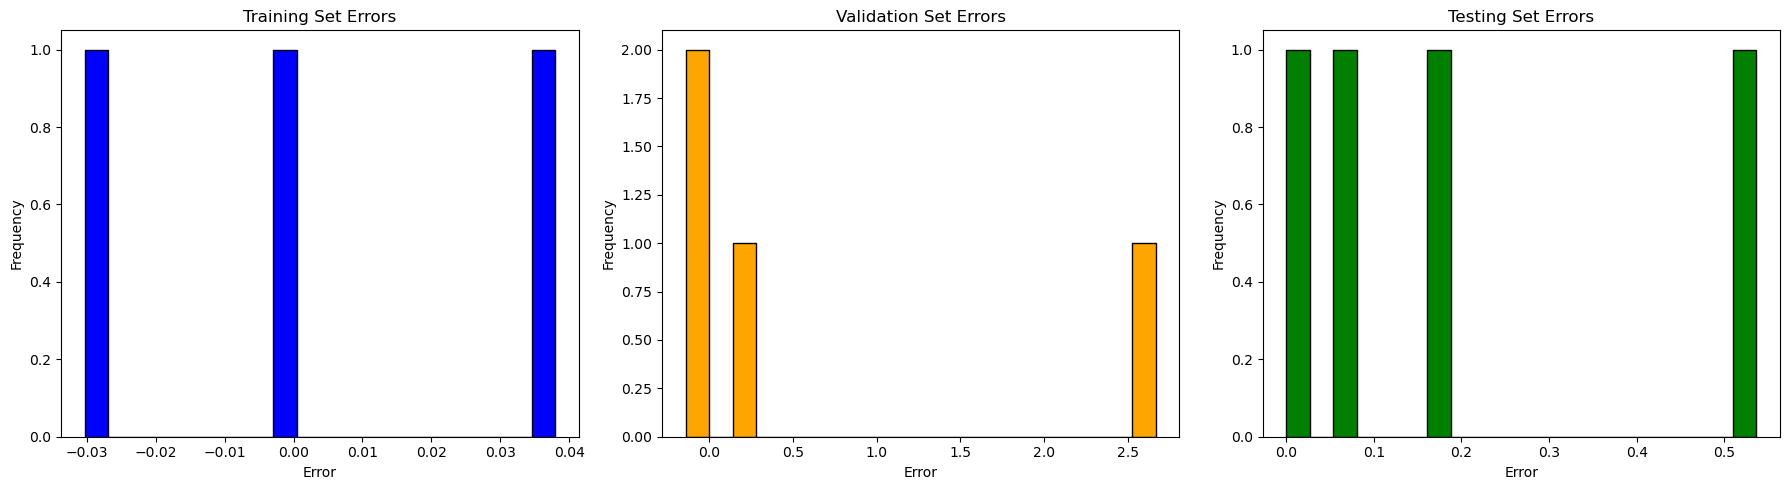

In [5]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

data_file_1 = r'C:\Users\12864\Desktop\数据科学大作业/数据.xlsx'
data_file_2 = r'C:\Users\12864\Desktop\数据科学大作业/死亡人数筛选后求和.xlsx'

data_1 = pd.read_excel(data_file_1)
data_2 = pd.read_excel(data_file_2)

merged_data = pd.merge(data_1, data_2, on='year_month')
merged_data = merged_data.drop(columns=['year_month'])

missing_values = merged_data.isnull().sum()

if missing_values.sum() > 0:
    merged_data = merged_data.fillna(merged_data.mean())

scaler = StandardScaler()
scaled_data = scaler.fit_transform(merged_data)

X = scaled_data[:, :-1]
y = scaled_data[:, -1]

# Split the data into training, validation, and testing sets (each 33%)
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

mlp_improved = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=1000, random_state=42)
mlp_improved.fit(X_train, y_train)

y_train_pred = mlp_improved.predict(X_train)
y_val_pred = mlp_improved.predict(X_val)
y_test_pred = mlp_improved.predict(X_test)

mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

mse_val = mean_squared_error(y_val, y_val_pred)
r2_val = r2_score(y_val, y_val_pred)

mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Display results
results = pd.DataFrame({
    'Set': ['Training', 'Validation', 'Testing'],
    'Samples': [len(y_train), len(y_val), len(y_test)],
    'MSE': [mse_train, mse_val, mse_test],
    'R²': [r2_train, r2_val, r2_test]
})

print(results)

# Plotting error histogram
train_errors = y_train - y_train_pred
val_errors = y_val - y_val_pred
test_errors = y_test - y_test_pred

plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
plt.hist(train_errors, bins=20, color='blue', edgecolor='black')
plt.title('Training Set Errors')
plt.xlabel('Error')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(val_errors, bins=20, color='orange', edgecolor='black')
plt.title('Validation Set Errors')
plt.xlabel('Error')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(test_errors, bins=20, color='green', edgecolor='black')
plt.title('Testing Set Errors')
plt.xlabel('Error')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

          Set  Samples       MSE        R²
0    Training        3  0.000786  0.991448
1  Validation        4  1.797957  0.195787
2     Testing        4  0.080303  0.761322


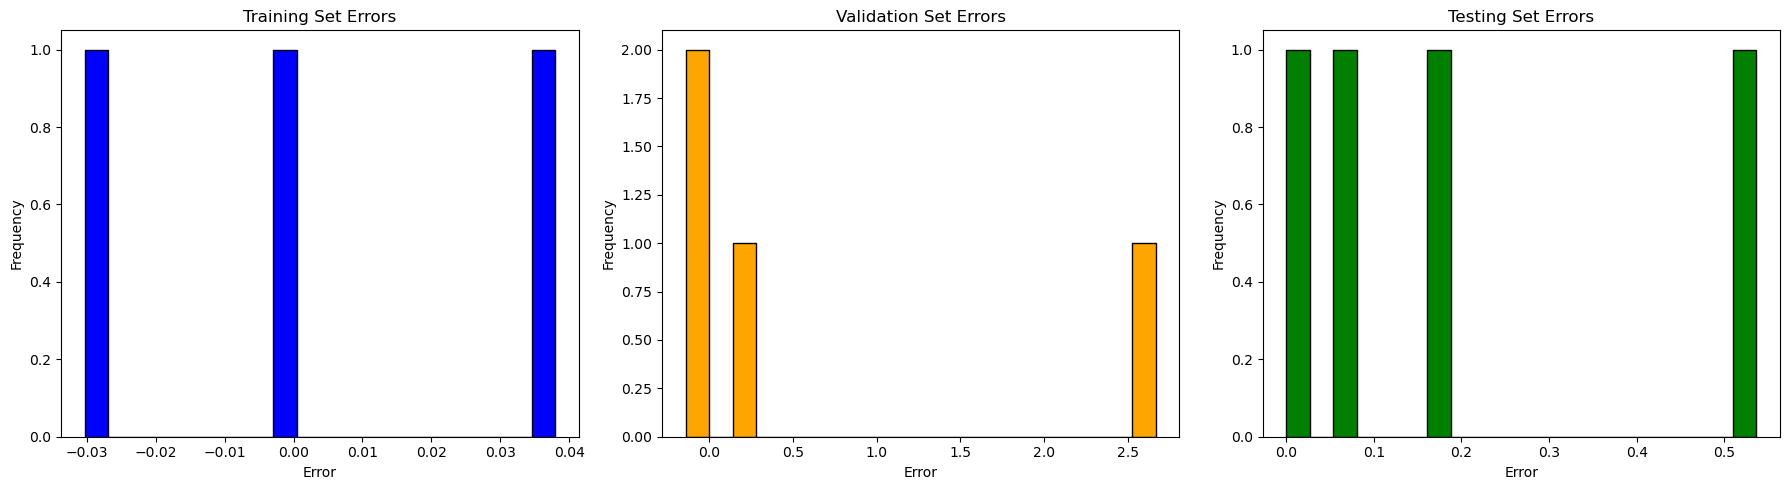

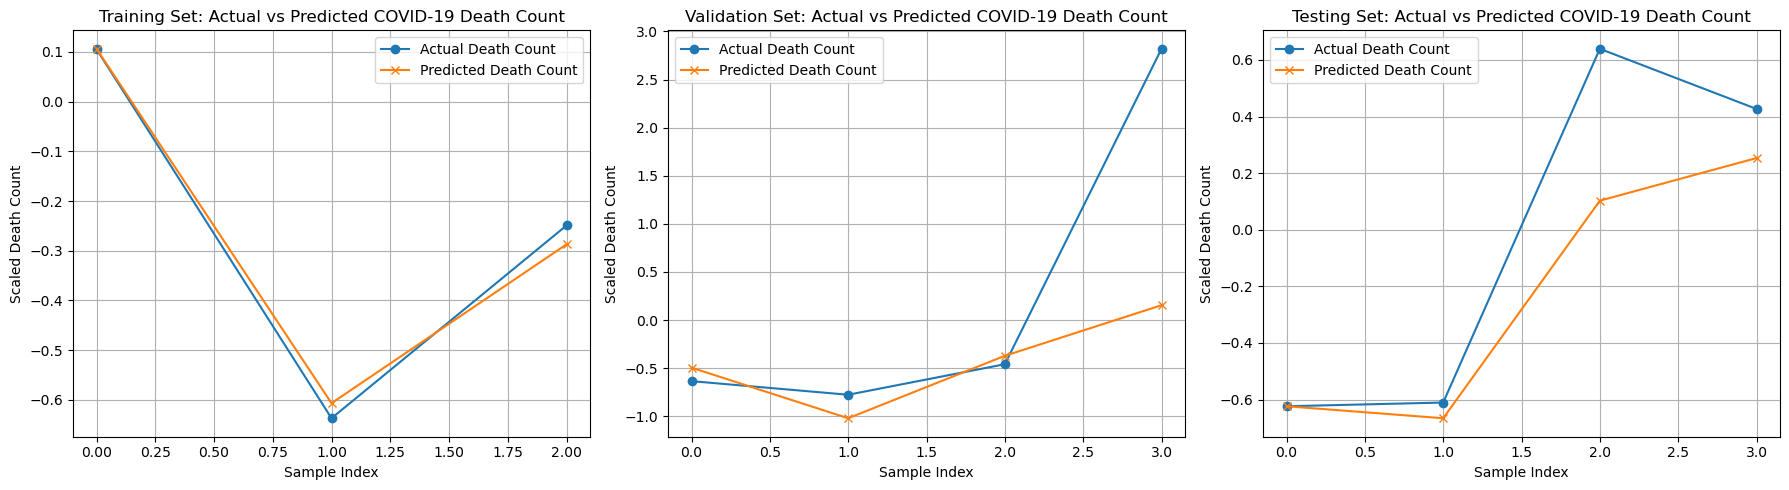

          Set  Samples       MSE        R²
0    Training        3  0.000786  0.991448
1  Validation        4  1.797957  0.195787
2     Testing        4  0.080303  0.761322


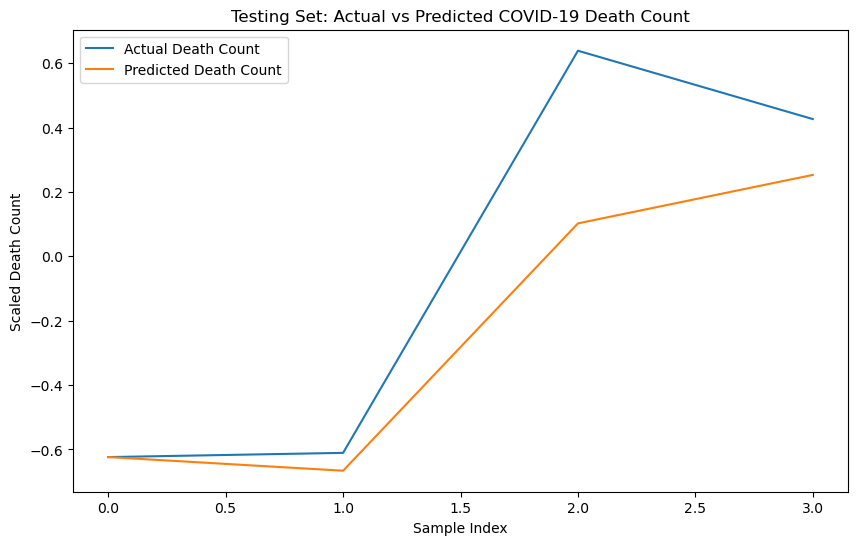

In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

data_file_1 = r'C:\Users\12864\Desktop\数据科学大作业/数据.xlsx'
data_file_2 = r'C:\Users\12864\Desktop\数据科学大作业/死亡人数筛选后求和.xlsx'

data_1 = pd.read_excel(data_file_1)
data_2 = pd.read_excel(data_file_2)

merged_data = pd.merge(data_1, data_2, on='year_month')
merged_data = merged_data.drop(columns=['year_month'])

missing_values = merged_data.isnull().sum()

if missing_values.sum() > 0:
    merged_data = merged_data.fillna(merged_data.mean())

scaler = StandardScaler()
scaled_data = scaler.fit_transform(merged_data)

X = scaled_data[:, :-1]
y = scaled_data[:, -1]

# Split the data into training, validation, and testing sets (each 33%)
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

mlp_improved = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=1000, random_state=42)
mlp_improved.fit(X_train, y_train)

y_train_pred = mlp_improved.predict(X_train)
y_val_pred = mlp_improved.predict(X_val)
y_test_pred = mlp_improved.predict(X_test)

mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

mse_val = mean_squared_error(y_val, y_val_pred)
r2_val = r2_score(y_val, y_val_pred)

mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Display results
results = pd.DataFrame({
    'Set': ['Training', 'Validation', 'Testing'],
    'Samples': [len(y_train), len(y_val), len(y_test)],
    'MSE': [mse_train, mse_val, mse_test],
    'R²': [r2_train, r2_val, r2_test]
})

print(results)

# Plotting comparison of actual vs predicted values for testing set
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Death Count')
plt.plot(y_test_pred, label='Predicted Death Count')
plt.title('Testing Set: Actual vs Predicted COVID-19 Death Count')
plt.xlabel('Sample Index')
plt.ylabel('Scaled Death Count')
plt.legend()
plt.grid(False)
plt.show()

C:\Users\12864\AppData\Local\Temp\ipykernel_22112\1574280313.py:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_df = df.groupby([df['date'].dt.to_period('M'), 'indicator_name']).sum().reset_index()


'C:\\Users\\12864\\Desktop\\数据科学大作业\\rural_grouped.xlsx'

Model Parameters: {'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


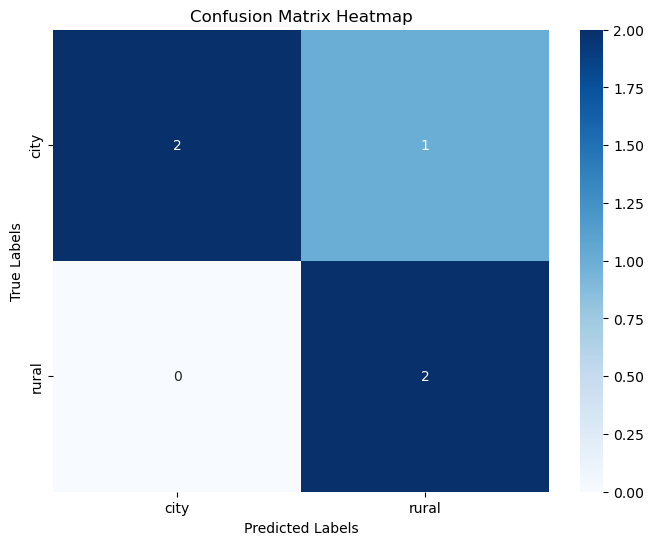

Classification Report:               precision    recall  f1-score   support

        city       1.00      0.67      0.80         3
       rural       0.67      1.00      0.80         2

    accuracy                           0.80         5
   macro avg       0.83      0.83      0.80         5
weighted avg       0.87      0.80      0.80         5



Model Parameters: {'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


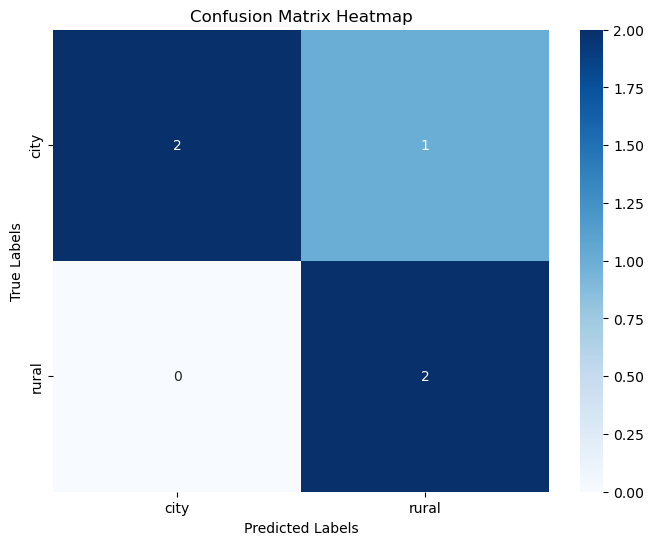

Classification Report:               precision    recall  f1-score   support

        city       1.00      0.67      0.80         3
       rural       0.67      1.00      0.80         2

    accuracy                           0.80         5
   macro avg       0.83      0.83      0.80         5
weighted avg       0.87      0.80      0.80         5

Training set size: 17
Testing set size: 5


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 加载数据
city_data = pd.read_excel(r'C:\Users\12864\Desktop\数据科学大作业/筛选后城市.xlsx')
rural_data = pd.read_excel(r'C:\Users\12864\Desktop\数据科学大作业/筛选后农村.xlsx')

# 添加标签
city_data['label'] = 'city'
rural_data['label'] = 'rural'

# 合并数据
combined_data = pd.concat([city_data, rural_data])

# 提取特征和标签
X = combined_data.drop(columns=['year_month', 'label'])
y = combined_data['label']

# 划分数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 训练集和测试集数量
train_size = len(X_train)
test_size = len(X_test)

# 训练SVM模型
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# 进行预测
y_pred = svm_model.predict(X_test)

# 评估模型
classification_report_result = classification_report(y_test, y_pred)
classification_report_dict = classification_report(y_test, y_pred, output_dict=True)

# 打印模型参数
model_params = svm_model.get_params()
print("Model Parameters:", model_params)

# 生成混淆矩阵
conf_matrix = confusion_matrix(y_test, y_pred)

# 绘制混淆矩阵热力图
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['city', 'rural'], yticklabels=['city', 'rural'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

# 打印评估结果
print("Classification Report:", classification_report_result)
print("Training set size:", train_size)
print("Testing set size:", test_size)


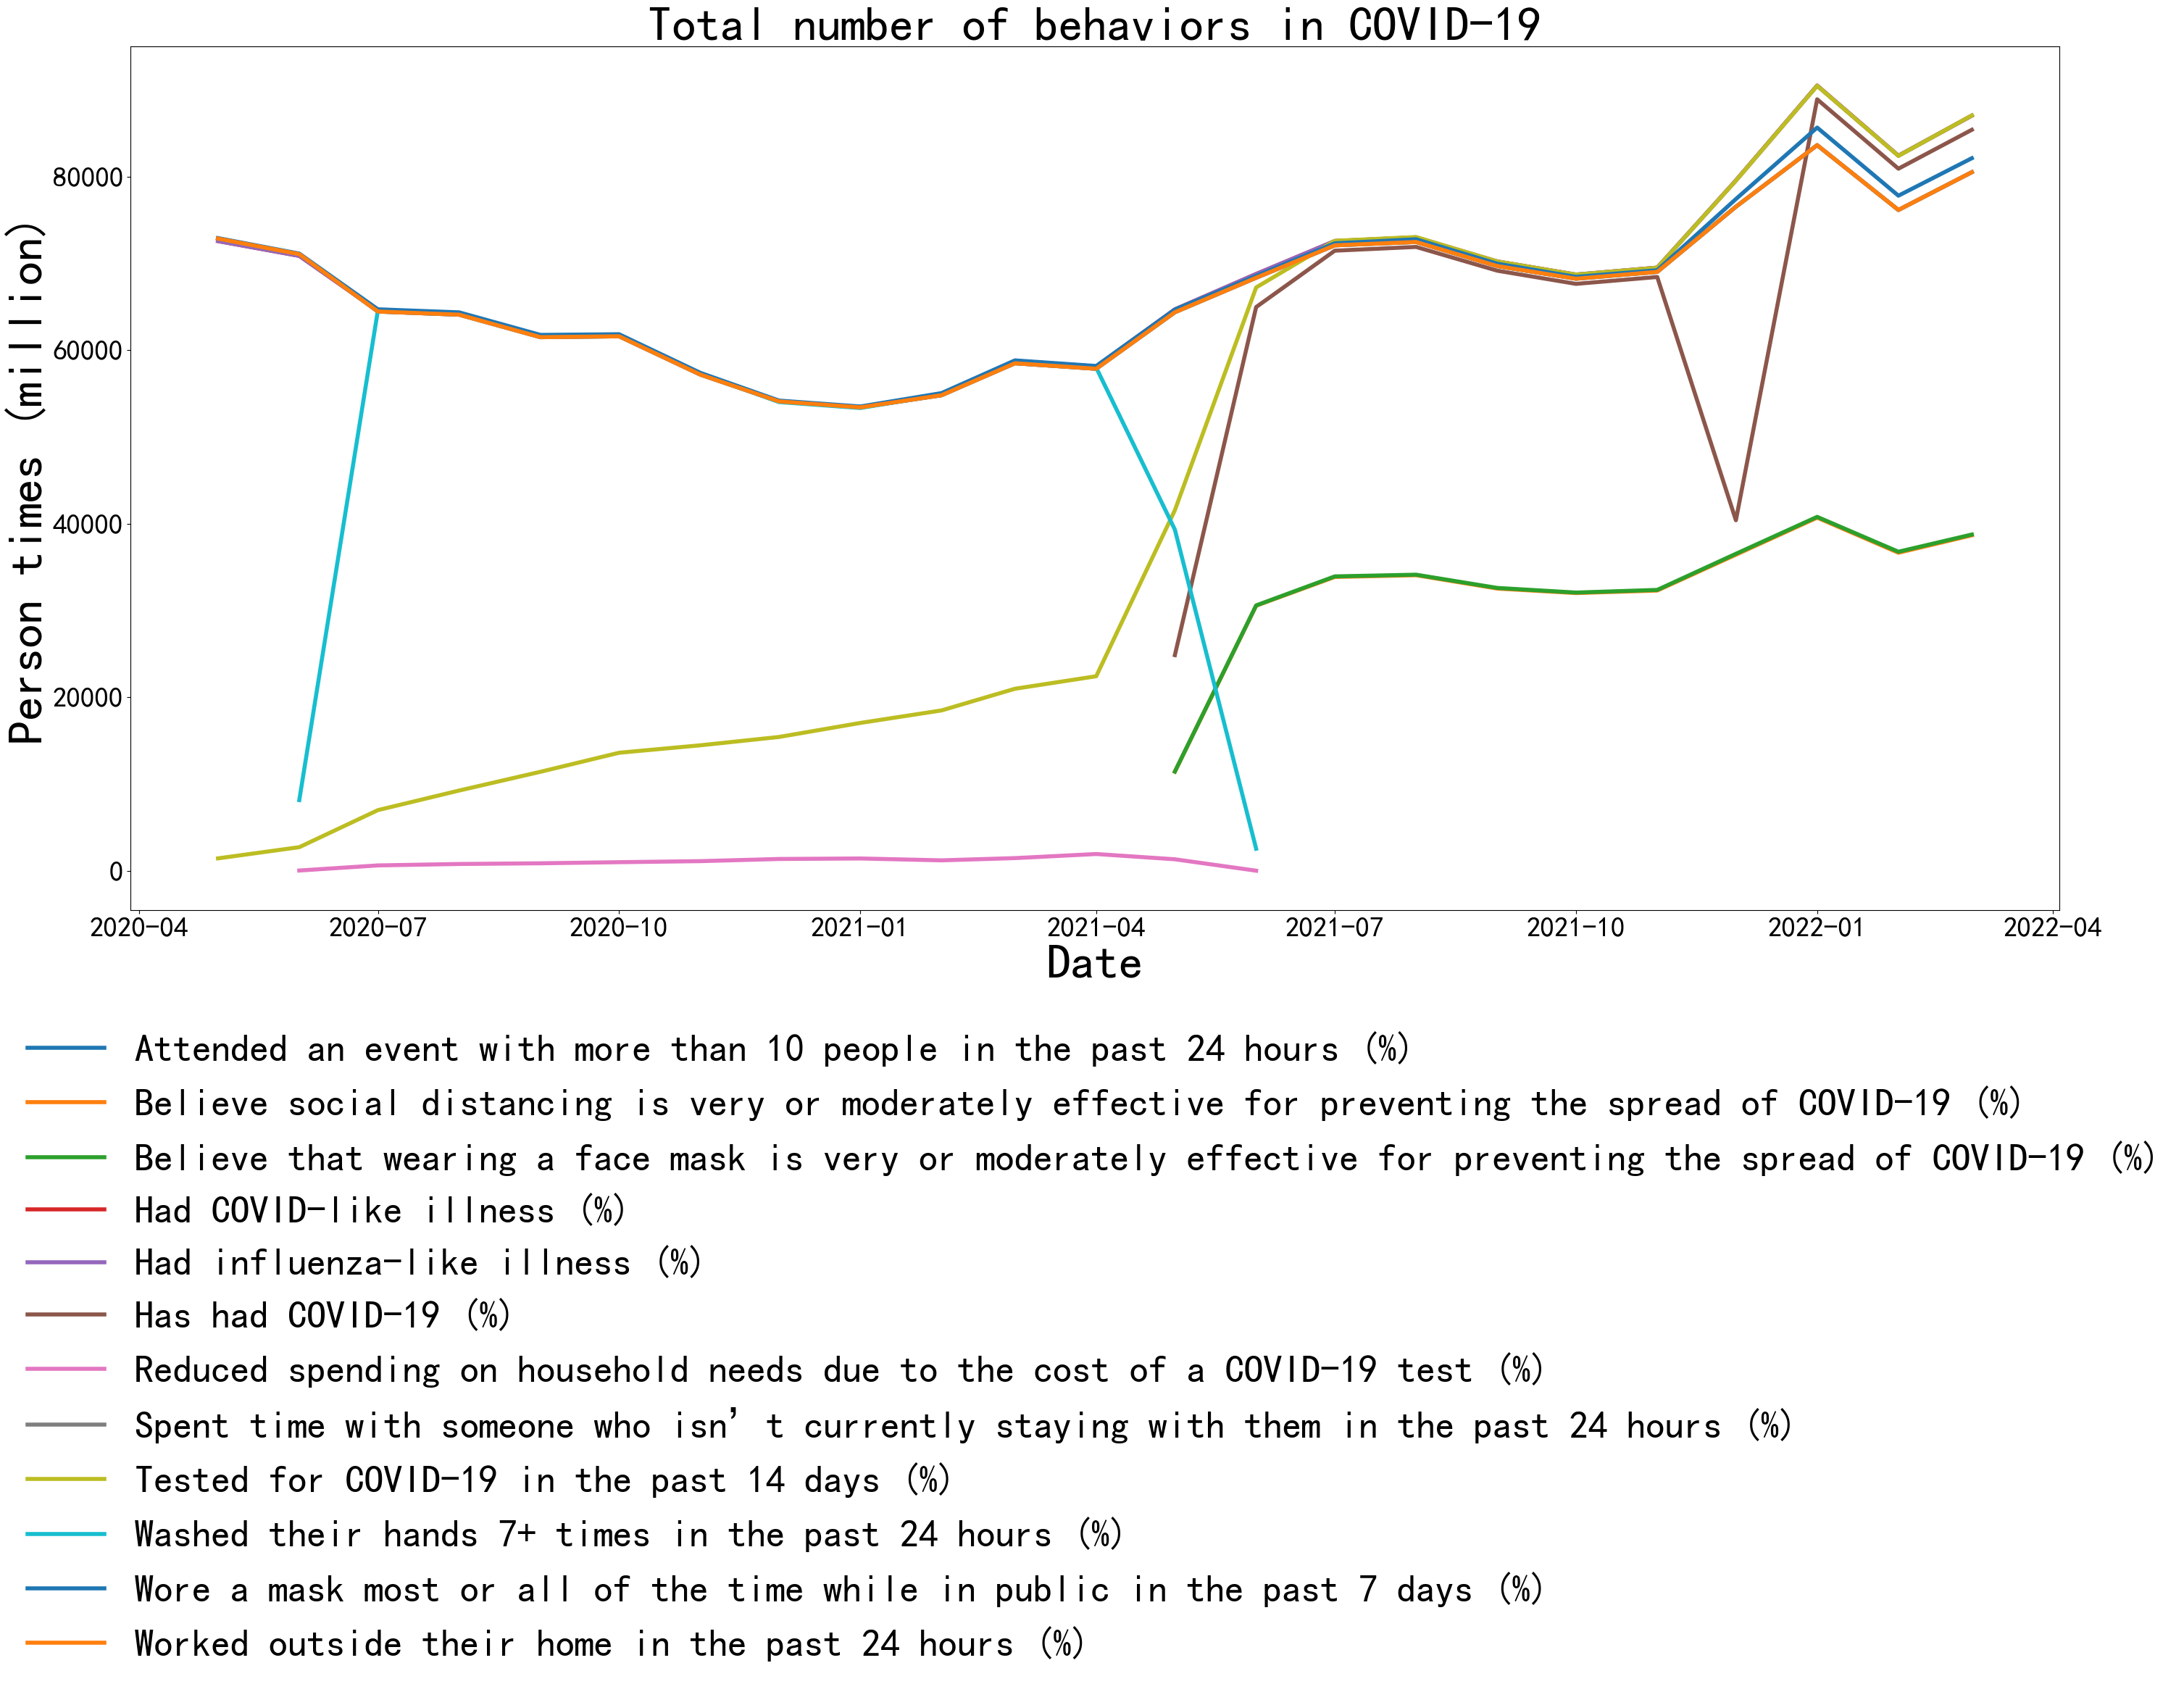

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

# 加载数据(这里注意改成自己文件所放置的位置)
data = pd.read_excel(r'C:\Users\12864\Desktop\数据科学大作业\行为各项求和数据.xlsx', usecols=['indicator_name', 'population', 'date'])

# 转换日期列为日期格式（如果它还不是）
data['date'] = pd.to_datetime(data['date'])

# 汇总数据，计算每个日期和指标的人口总和
summary = data.groupby(['indicator_name', 'date'])['population'].sum().reset_index()

# 将人口单位转换为百万人
summary['population'] = summary['population'] / 1e6

# 绘图
plt.figure(figsize=(32, 24))
for label, df in summary.groupby('indicator_name'):
    plt.plot(df['date'], df['population'], label=label, linewidth=4)  # 加粗折线
    # 标记最高点
    max_population = df['population'].max()
    max_date = df[df['population'] == max_population]['date']
plt.title('Total number of behaviors in COVID-19', fontsize=48)
plt.xlabel('Date', fontsize=48)
plt.ylabel('Person times (million)', fontsize=48)
plt.xticks(fontsize=28)
plt.yticks(fontsize=28)

# 将图例放置在图表的底部
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=1, frameon=False, fontsize=38)
plt.grid(False)
plt.tight_layout()
plt.show()
